# **IBM EMPLOYEE ATTRITION ANALYSIS AND PREDICTION**

# **IMPORTING LIBRARIES**

In [42]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

### **Data Source**

https://www.kaggle.com/code/rohitsahoo/ibm-employee-attrition-analysis-and-prediction/input

#**Reading the data into pandas**

In [44]:
df=pd.read_csv('/content/train.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


**DATA DICTIONARY**

In [45]:

Education={1:'Below College', 2:'College',  3:'Bachelor', 4:'Master', 5:'Doctor'}
EnvironmentSatisfaction={1:'Low', 2:'Medium', 2:'High', 3:'Very High'}
JobInvolvement={1:'Low', 2:'Medium', 3: 'High', 4 :'Very High'}
JobSatisfaction={1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
PerformanceRating={1:'Low', 2:'Good', 3: 'Excellent', 4: 'Outstanding'}
RelationshipSatisfaction= {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
WorkLifeBalance= {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}
Attrition={0:"No", 1: "Yes"}

# **PREPROCESSING**

In [46]:
df['Attrition']=df['Attrition'].replace(Attrition)

**Checking for Null**

In [47]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   object
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

**OBJECT**

In [48]:
df.select_dtypes('O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1053,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
1054,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Divorced,Y,No
1055,No,Travel_Frequently,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1056,Yes,Travel_Frequently,Sales,Technical Degree,Male,Sales Representative,Married,Y,No


In [49]:
(df.select_dtypes('O')).describe().T

,count,unique,top,freq
Attrition,1058,2,No,879
BusinessTravel,1058,3,Travel_Rarely,746
Department,1058,3,Research & Development,701
EducationField,1058,6,Life Sciences,436
Gender,1058,2,Male,620
JobRole,1058,9,Sales Executive,232
MaritalStatus,1058,3,Married,464
Over18,1058,1,Y,1058
OverTime,1058,2,No,751


**NUMBERS**

In [50]:
number=df.select_dtypes('number')

In [51]:
number.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,2.090737,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,1.136514,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


# **ANALYSIS**

**HOW MANY EMPLOYEES ENCOUNTERD ATTRITION IN IBM?**

In [52]:
Attrition={'Yes': df[df['Attrition']=="Yes"]['Attrition'].count(), 'No':df[df['Attrition']=="No"]['Attrition'].count()}
Attrition=pd.Series(Attrition)
fig = px.pie(df, values=Attrition.values, names=Attrition.index, title= "Percentage of Attrition in the Company")
fig.update_layout(legend= {'title' : 'Attrition'})
fig.show()

**Observation**: The chart above illustrates that 16.9%, equating to 179 employees encountered Attrition in IBM.

**IS ATTRITION DEPENDENT ON AGE?**

In [53]:
Data=pd.crosstab(index=df['Age'].replace('Age'), columns=df['Attrition'], normalize=False)
px.line(data_frame=Data, title="Relationship between age and Attrition")

**Observation**
As illustrated on the chart above, attrition Peaks at the age of 31 and  thereafter, it starts dwindling. The attrition rate decreases as the age increases, as people grow older they look for stability 

**IS ATTRITION DEPENDANT ON JOB LEVEL?**

In [54]:
Data=pd.crosstab(index=df['JobLevel'].replace('JobLevel'), columns=df['Attrition'], normalize=False)
px.line(data_frame=Data, title="Relationship between Job Level and Attrition")

**Observation** As Illustrated by the graph above, Employees with low job level are prone to leave the company in search for greener pastures compared to those at a high job level.

**IS ATTRITION DEPENDENT ON INCOME?**  

In [55]:
px.histogram(df, x="MonthlyIncome", color="Attrition", color_discrete_sequence=['red', 'blue'], title="Relationship between income distribution and attrition")


**Observation** As illustrated on the cahrt above, Attrition is dependent on the Income. People with low income around tend to have high attrition compared to people with high income. 

**DOES ATTRITION DEPEND ON THE NUMBER OF COMPAMNIES WORKED?**

In [56]:
Data=pd.crosstab(index=df['NumCompaniesWorked'].replace('Years At Company'), columns=df['Attrition'], normalize=False)
px.line(data_frame=Data, title="Relationship Number of Company Worked and Attrition")

**Observation** Employees who have worked for fewier number of Companies have high attrition rate compared to employees who have worked for many companies. 

**DOES TRAVELING AFFECT ATTRITION?**

In [57]:
data = pd.crosstab(index=df['BusinessTravel'].replace(Education), columns=df['Attrition'], normalize=False)
fig = px.bar(data_frame=data, barmode="stack", title="Business Travel versus Attrition")
# Set axis labels
fig.update_layout(xaxis_title='Education', yaxis_title="Frequency [count]", legend= {'title' : 'Attrition'})

**Observation**
The rate of attrition is greater for employees who Rarely Travel than those who travel frequently and those who never travelled. 

**DOES WORKING OVERTIME AFFECT ATTRITION?**

In [58]:
data = pd.crosstab(index=df['OverTime'].replace(Education), columns=df['Attrition'], normalize=False)
fig = px.bar(data_frame=data, barmode= 'stack', title="Overtime versus Attrition")
fig.update_layout(xaxis_title=' Overtime', yaxis_title="Frequency [count]", legend= {'title' : 'Attrition'})

**Observation** The rate of attrition is greater for employees who have a lot of overtime compare to those who don't. The chart above illustrustrates that 32% of people who have overtime are more likely to encounter attrition and only 9% of people who do not work overtime encounter Attrition. 

# **PREPROCESSING**

**CHECKING FOR MULTICOLINEARITY**

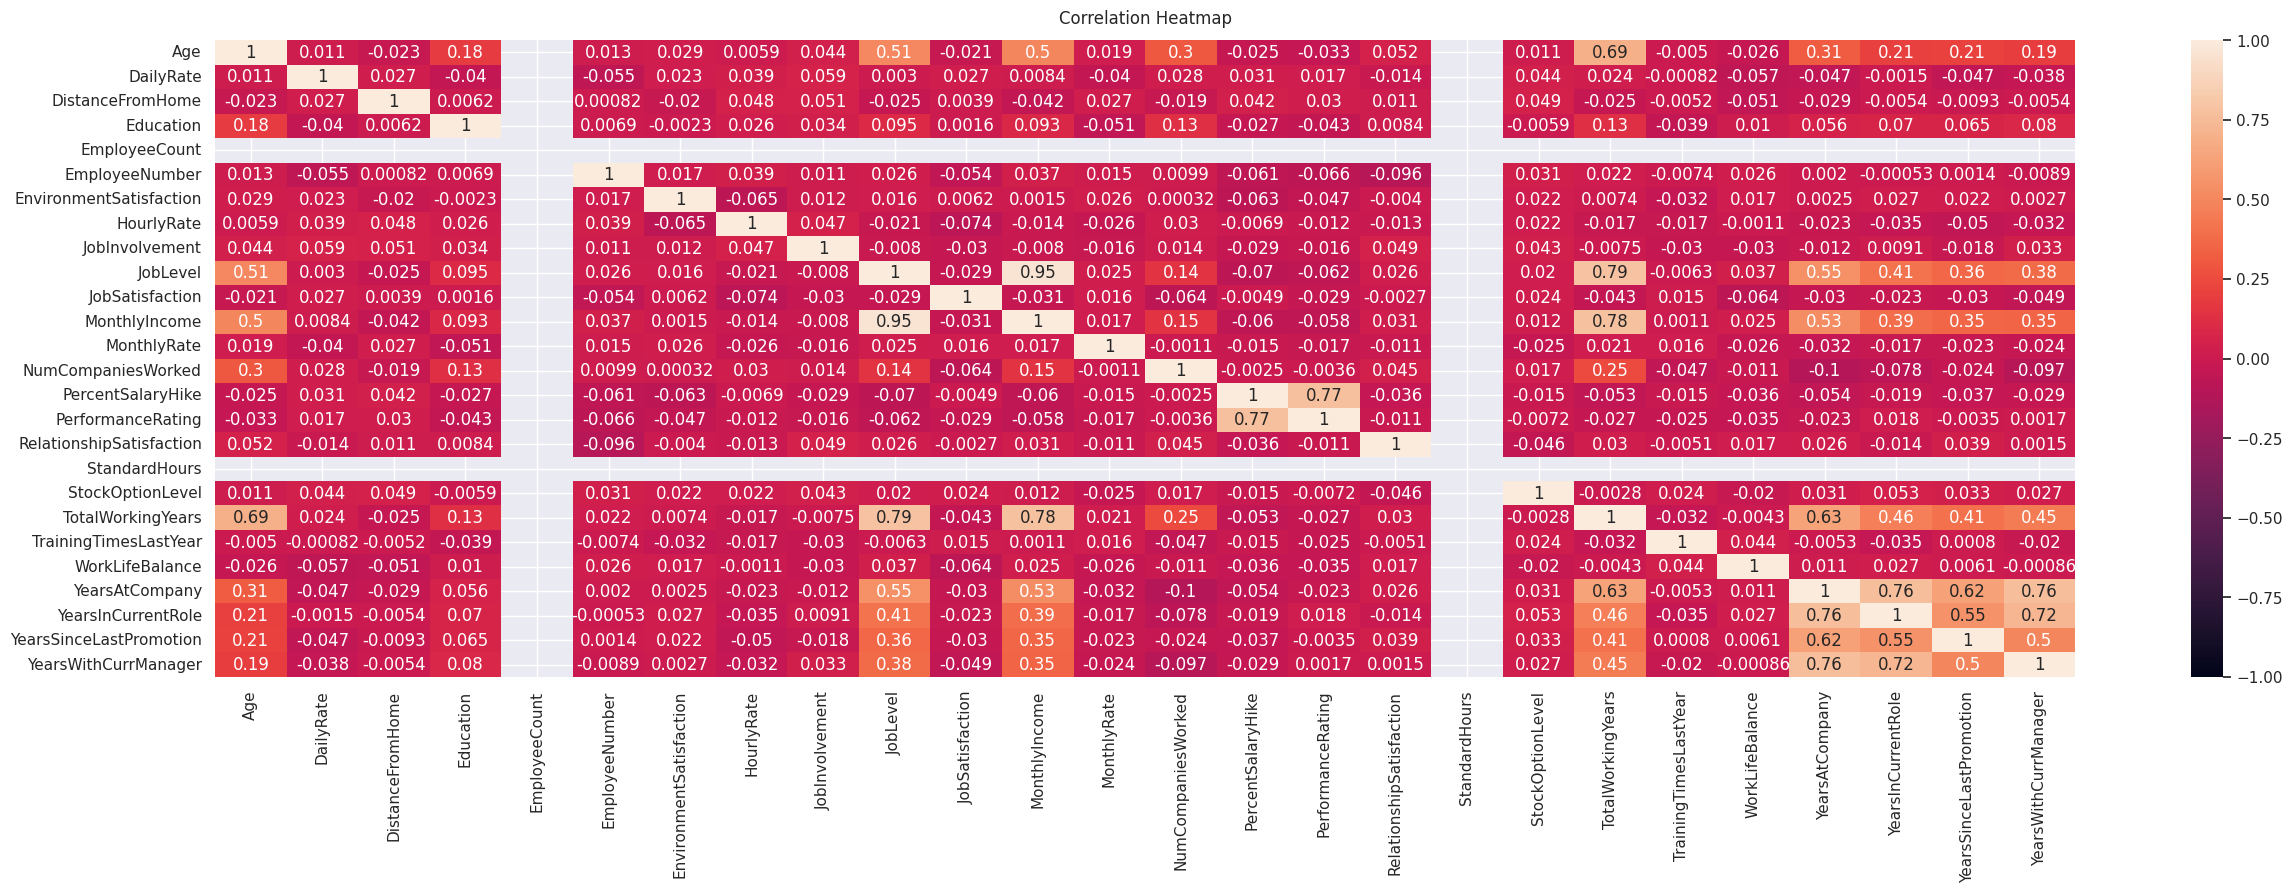

In [59]:
sns.set(rc={'figure.figsize':(30,8.27)})
num=(df.select_dtypes('number'))
heatmap=sns.heatmap(num.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observation**

1.The correlation between Percent Salary Hike and and Performance Rating is 0.77. However, Performance Rating highly correlates with attrition compared to Percent Salary Hike. Thus, performance rating will be used to build the model. 

2.Job level, total working years and monthly income correlate with each other.However, Total working years greatly correlates with attrition compared to two other features.

3.Years At Company, Years In Current Role and  Years With Current Manager correlates with one another. Either years In Current Role or  Years With Current Manager is going to be used to build a model because their correlation towards attrition are equal and higher than years at company. 



 

**CHECKING FOR LOW AND HIGH CARDINALITY**

**Observation** Employee count, Over18 and Standard Hours has one unique value. Thus, these two features have low cardinality. Each employee has a unique Employee Number, thus resulting in high cardinality. 

**DROPING COLUMNS SHOWING MULTICOLINERITY, LOW AND HIGH CARDINALITY**

In [60]:
drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]

**SEPERATING THE OUTPUT FROM PREDICTORS**

In [61]:
df.drop(columns = drop_columns, inplace=True)
y=df['Attrition']
df.drop(columns = ['Attrition'], inplace=True)

**ENCODING**

In [62]:
X=pd.get_dummies(df, drop_first=True)

**SPLITING THE DATA**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42)

# **MODELLING**

**LOGISTIC REGRESSION**

In [64]:
# Model Building
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=(1000)))
# Fitting model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [65]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       176
         Yes       0.75      0.42      0.54        36

    accuracy                           0.88       212
   macro avg       0.82      0.69      0.73       212
weighted avg       0.87      0.88      0.86       212



**DECISION TREE CLASSIFIER**

In [66]:
# Model Building
Dmodel = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
# Fitting model to training data
Dmodel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [67]:
#classification report
print(classification_report(y_test, Dmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.88      0.84      0.86       176
         Yes       0.35      0.42      0.38        36

    accuracy                           0.77       212
   macro avg       0.61      0.63      0.62       212
weighted avg       0.79      0.77      0.78       212



In [68]:
#Decision Tree Depth
depth = Dmodel.named_steps['decisiontreeclassifier'].get_depth()
depth

14

In [69]:
#Depth with High Accuracy
Dep= range(1, 15)
Accuracy=[]

for i in Dep:
  # Model Building
  dmodel = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=i, random_state=42))
  # Fitting model to training data
  dmodel.fit(X_train, y_train)
  #Accuracy
  Accuracy.append(dmodel.score(X_test, y_test))
Accuracy=pd.Series(Accuracy, index=Dep)
Accuracy.max()

0.8349056603773585

**RANDOM FOREST CLASSIFIER**

In [70]:
#Pipeline
clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

In [71]:
#Params
params = {'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [72]:
#Grid Search
Rmodel = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
Rmodel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [73]:
#Oversampling
OverSampler=RandomOverSampler(random_state=42)
oX_train, oy_train=OverSampler.fit_resample(X_train, y_train)

In [74]:
#Oversampling
Rmodel.fit(oX_train, oy_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [75]:
#Resti=Rmodel.best_estimator_
Rparams=Rmodel.best_params_
Rparams


{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 75}

In [76]:
#classification report
print(classification_report(y_test, Rmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       176
         Yes       0.83      0.28      0.42        36

    accuracy                           0.87       212
   macro avg       0.85      0.63      0.67       212
weighted avg       0.86      0.87      0.84       212



**Gradient Boosting Classifier**

In [77]:
#Building a Pipeline
Gclf = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [78]:
# Params for out GridSerchCV
Gparams = {'gradientboostingclassifier__n_estimators': range(10, 100, 5), 'gradientboostingclassifier__max_depth': range(10, 50, 5)}

In [79]:
#GridSearchCV
Gmodel = GridSearchCV(Gclf, param_grid=Gparams, cv=5, n_jobs=-1, verbose=1)

In [80]:
#Model Training
Gmodel.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 50, 5),
                         'gradientboostingclassifier__n_estimators': range(10, 100, 5)},
             verbose=1)

In [81]:
Gparams=Gmodel.best_params_
Gparams

{'gradientboostingclassifier__max_depth': 10,
 'gradientboostingclassifier__n_estimators': 25}

In [82]:
#classification report
print(classification_report(y_test, Gmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.86      0.87       176
         Yes       0.37      0.39      0.38        36

    accuracy                           0.78       212
   macro avg       0.62      0.63      0.62       212
weighted avg       0.79      0.78      0.79       212



**FUNCTION FOR PROCESSING DATA AND PREDICTING ATTRITION**

In [83]:
def attrition_prediction(path):
  
  #Load data into a dataframe
  df=pd.read_csv(path)

  #Copy of the dataframe
  DF=df.copy()

  #Drop the columns not used for the model
  drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]
  df.drop(columns=drop_columns, inplace=True)

  #Encoding 
  X=pd.get_dummies(df, drop_first=True)

  #Predict attrition
  DF['Attrition']= model.predict(X)

  return DF


**DATAFRAME WITH THE PREDICTED ATTRITION**

In [84]:
attrition_prediction('/content/test.csv')


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,80,0,16,2,4,15,9,10,10,Yes
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,80,1,1,3,3,1,0,0,0,No
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,80,0,4,2,2,0,0,0,0,Yes
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,80,1,1,2,3,1,0,0,0,No
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,80,0,16,2,2,2,2,2,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
410,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No
